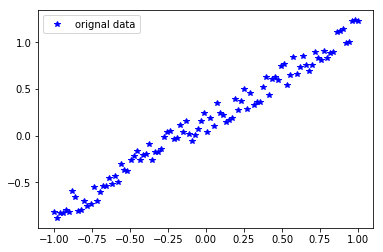

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1,1,100)
Y = X + np.random.rand(*X.shape)*0.3
plt.plot(X, Y, 'b*', label = 'orignal data')
plt.legend()
plt.show()

('Epoch', 1, 'cost=', 0.29284438, 'w=', array([1.1901451], dtype=float32), 'b=', array([0.4642926], dtype=float32))
('Epoch', 3, 'cost=', 0.044282194, 'w=', array([1.7843374], dtype=float32), 'b=', array([0.3341993], dtype=float32))
('Epoch', 5, 'cost=', 0.022192352, 'w=', array([1.94863], dtype=float32), 'b=', array([0.27280068], dtype=float32))
('Epoch', 7, 'cost=', 0.020688005, 'w=', array([1.9912901], dtype=float32), 'b=', array([0.25645787], dtype=float32))
('Epoch', 9, 'cost=', 0.020587327, 'w=', array([2.0023246], dtype=float32), 'b=', array([0.25222397], dtype=float32))
('Epoch', 11, 'cost=', 0.020580605, 'w=', array([2.0051773], dtype=float32), 'b=', array([0.25112912], dtype=float32))
('Epoch', 13, 'cost=', 0.020580158, 'w=', array([2.0059147], dtype=float32), 'b=', array([0.2508462], dtype=float32))
('Epoch', 15, 'cost=', 0.02058013, 'w=', array([2.0061054], dtype=float32), 'b=', array([0.2507731], dtype=float32))
('Epoch', 17, 'cost=', 0.020580124, 'w=', array([2.0061553], 

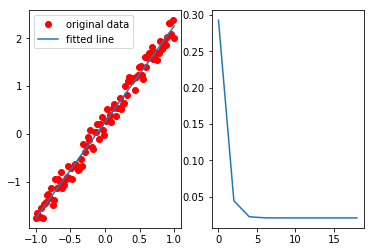

('x = 0.1, z=', array([6.2692575], dtype=float32))


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Train_X = np.linspace(-1,1,100)
Train_Y = 2*Train_X + np.random.rand(*Train_X.shape)*0.5

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')

Z = tf.multiply(X, W) + b

cost = tf.reduce_mean(tf.square(Z - Y))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

train_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[], "loss":[]}
    for epoch in range(train_epochs):
        for (x,y) in zip(Train_X,Train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % display_step == 0:
            loss = sess.run(cost , feed_dict={X:Train_X, Y:Train_Y})
            print ("Epoch", epoch+1, "cost=", loss, "w=", sess.run(W), "b=",sess.run(b))
            if not (loss == "NA"):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print "Done"
    print ("Epoch", epoch+1, "cost=", loss, "w=", sess.run(W), "b=",sess.run(b))

    plt.subplot(121)
    plt.plot(Train_X, Train_Y, 'ro', label='original data')
    plt.plot(Train_X, sess.run(W)*Train_X+ sess.run(b), label='fitted line')
    plt.legend()
    
    plt.subplot(122)
    
    plt.plot(plotdata['batchsize'],plotdata['loss'])
    
    plt.show()
    
    print ("x = 3, z=", sess.run(Z, feed_dict={X: 3}))



<type 'numpy.ndarray'>


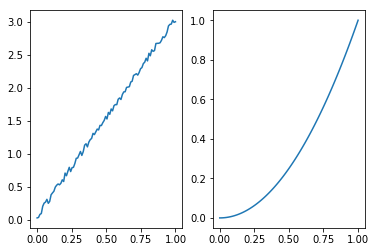

In [19]:
#import tensorflow as tf
#print tf.__version__
import numpy as np

Train_X = np.linspace(-1,1,100)
Train_Y = Train_X + np.random.rand(*Train_X.shape)*0.3
print type(Train_Y)

X = np.linspace(0,1,100)
Y = X*3 + np.random.rand(100)*0.1
plt.subplot(121)
plt.plot(X,Y)
plt.subplot(122)
Y = np.power(X,2)
plt.plot(X,Y)

plt.show()

